### https://www.kaggle.com/rajeshjnv/ml-to-visualization-prediction-of-app-ratings

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.


### Data Collection

In [2]:
def collect_data(path,filename):
    data=pd.read_csv(path+'/'+filename)
    return data

In [3]:
path=r'F:\Machine Learning\Projects\App_ratings\archive'
filename= 'googleplaystore.csv'
data=collect_data(path,filename)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
def get_stats(data):
    print(data.info())
    print('\n')
    print('Shape of Dataframe is {}'.format(data.shape))
    print('\n')
    print('Missing values are:')
    print(data.isnull().sum())
    print('\n')
    print('Data Types of feature are:')
    print(data.dtypes)

In [5]:
get_stats(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Shape of Dataframe is (10841, 13)


Missing values are:
App                  0
Category             0
Rating            1474
Reviews              0
Size    

### Lets figure out whether we have some invalid entries in data or not?

In [6]:
### Lets figure out in Rating(Dependent feature)..
data[data['Rating']<0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### while preprocessing and viewing the data we observe that in this Datasets the maximum rating of an app is 19 which is not posible yet,we know that the maximum rating of an app in the google play store is 5. >>so we confenditly says that something wrong.

In [7]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### By viewing this we say that in this row all data are placed wrong by one position so we shift the data to the right hand size and make correct position.

In [8]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)

In [9]:
data[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [10]:
### >>By shifting the row right by 1 we get actual value of rating

In [11]:
### We see that the app 'Life Made WI-Fi Touchscreen Photo Frame' does not have any category,
### when we search this app on play store we found that it belong to lifestyle category..

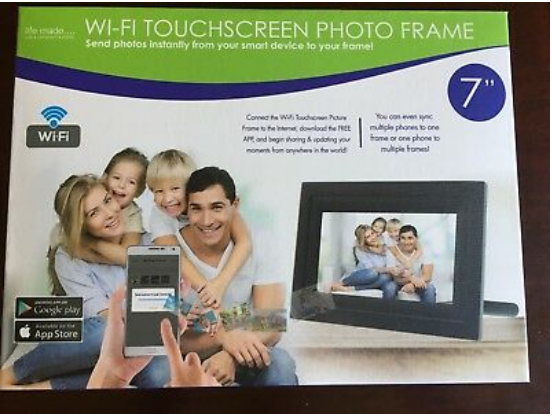

In [12]:
from IPython.display import Image
Image(filename=r'C:\Users\mcr\Pictures\Screenshots\play_store.png') 

In [13]:
### Here we added 2 more columns in the data set by spliting the last updated attribute, 
### by doing this we find that in which year apps are added or updated on playstore.

In [14]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [15]:
data['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10841, dtype: object

In [16]:
data['Last Updated'].isna().sum()

0

In [17]:
data["Last Updated"] = pd.to_datetime(data['Last Updated'])


## might face this error
##ValueError: day is out of range for month
##ParserError: day is out of range for month: 1.0.19


In [18]:
data['year_added']=data['Last Updated'].dt.year
data['month_added']=data['Last Updated'].dt.month
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


## Data Visualization

### What type of services people loves either paid or free??

In [19]:
data['Type'].isna().sum()

1

In [20]:
data.dropna(inplace=True,subset=['Type'])

In [21]:
data['Type'].isna().sum()

0

In [19]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [20]:
import plotly.express as px

In [21]:
labels=data['Type'].value_counts().index

In [22]:
values=data['Type'].value_counts().values

In [ ]:
px.pie(values=values,labels=labels)

### Lets perform analysis with respect to both free & paid

In [24]:
df1=data[data['Type']=='Free']
df2=data[data['Type']=='Paid']

In [25]:
free=pd.DataFrame(df1['year_added'].value_counts()).reset_index()

In [26]:
free.columns=['year','count']

In [27]:
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [27]:
paid=pd.DataFrame(df2['year_added'].value_counts()).reset_index()
paid.columns=['year','count']

In [29]:
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [28]:
row={'year':2010,'count':0}

In [29]:

paid=paid.append(row,ignore_index=True)

In [32]:
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [33]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [34]:
trace1  = go.Scatter(x=free["year"], y=free["count"])
trace2  = go.Scatter(x=paid["year"], y=paid["count"])


In [35]:
y = [trace1, trace2]

In [36]:
layout={'title':"app udated or added over the years",
        'xaxis':{'title':"years"}}


In [ ]:
fig = go.Figure(data=y, layout=layout)
iplot(fig)

### Automate above stuffs

In [47]:
def stats(dataframe,feature,column1,column2):
    df=dataframe[feature].value_counts().reset_index()
    df.columns=[column1,column2]
    return df

In [78]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def need_visual(df1=None,df2=None,column1=None,column2=None,dict_title=None,visual='scatter'):
    if visual=='scatter':
        trace1  = go.Scatter(x=df1[column1], y=df1[column2])
        trace2  = go.Scatter(x=df2[column1], y=df2[column2])
        y = [trace1, trace2]
        layout=dict_title
        fig = go.Figure(data=y, layout=layout)
        return iplot(fig)
    
    elif visual=='bar':
        return px.bar(df1,x=column1,y=column2)
    
    

In [52]:
free=stats(df1,'year_added','year','count')
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [53]:
paid=stats(df2,'year_added','year','count')

row={'year':2010,'count':0}
paid=paid.append(row,ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [ ]:
need_visual(free,paid,'year','count',dict_title={'title':"app udated or added over the years",'xaxis':{'title':"years"}})

### in which month Free apps added are most??

In [58]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [75]:
output=stats(df1,'month_added','month','count').sort_values(by='month')
output

,month,count
7,1,444
6,2,489
4,3,595
5,4,553
3,5,897
2,6,1179
0,7,3022
1,8,1511
11,9,283
9,10,357


In [79]:
output['month'].index

Int64Index([7, 6, 4, 5, 3, 2, 0, 1, 11, 9, 10, 8], dtype='int64')

In [ ]:
need_visual(df1=output,column1='month',column2='count',visual='bar')

In [39]:
##df1.groupby('month_added')['month_added'].count()

## df1['month_added'].value_counts()
## df1.groupby('month_added').agg({'month_added':'count'})

month_added
1      444
2      489
3      595
4      553
5      897
6     1179
7     3022
8     1511
9      283
10     357
11     347
12     363
Name: month_added, dtype: int64

In [40]:
##output=pd.DataFrame(df1.groupby('month_added')['month_added'].count())

In [41]:
##output.columns=['count']

In [42]:
##output=output.reset_index()

In [43]:
##output

,month_added,count
0,1,444
1,2,489
2,3,595
3,4,553
4,5,897
5,6,1179
6,7,3022
7,8,1511
8,9,283
9,10,357


## in which month Paid apps added are most??

In [64]:
output2=stats(df2,'month_added','month','count').sort_values(by='month')
output2

,month,count
7,1,47
8,2,45
4,3,72
6,4,63
3,5,81
1,6,93
0,7,141
2,8,83
11,9,31
9,10,41


In [ ]:
need_visual(df1=output2,column1='month',column2='count',visual='bar')

In [45]:
##output2=pd.DataFrame(df2.groupby('month_added')['month_added'].count())

In [46]:
##output2.columns=['count']
##output2=output2.reset_index()

In [47]:
##output2

,month_added,count
0,1,47
1,2,45
2,3,72
3,4,63
4,5,81
5,6,93
6,7,141
7,8,83
8,9,31
9,10,41


In [48]:
##px.bar(output2, x='month_added', y='count')

### Is Google Bias towards Free or Paid Apps ??

In [49]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [66]:
output3=stats(df1,'Content Rating','users','count')
output3

,users,count
0,Everyone,8020
1,Teen,1156
2,Mature 17+,479
3,Everyone 10+,380
4,Adults only 18+,3
5,Unrated,2


In [67]:
output4=stats(df2,'Content Rating','users','count')
output4

,users,count
0,Everyone,695
1,Teen,52
2,Everyone 10+,33
3,Mature 17+,20


In [ ]:
need_visual(output3,output4,'users','count')

In [51]:
##df1['Content Rating'].value_counts()
## df1.groupby('Content Rating').agg({'Content Rating':'count'})

Everyone           8020
Teen               1156
Mature 17+          479
Everyone 10+        380
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [52]:
## for free apps
##rating1=df1['Content Rating'].value_counts().reset_index()
##rating1.columns=['users','count']
##rating1

,users,count
0,Everyone,8020
1,Teen,1156
2,Mature 17+,479
3,Everyone 10+,380
4,Adults only 18+,3
5,Unrated,2


In [54]:
## for paid apps
##rating2=df2['Content Rating'].value_counts().reset_index()
##rating2.columns=['users','count']
##rating2

,users,count
0,Everyone,695
1,Teen,52
2,Everyone 10+,33
3,Mature 17+,20


In [55]:
## similar stats using function
##stats(df2,'Content Rating','users','count')

,users,count
0,Everyone,695
1,Teen,52
2,Everyone 10+,33
3,Mature 17+,20


In [56]:
'''
trace1 = go.Scatter(x=rating1['users'], y=rating1["count"], name="Free")
trace2 = go.Scatter(x=rating2['users'], y=rating2["count"], name="Paid")
y = [trace1, trace2]
'''

In [57]:

'''
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)
'''

## Getting a distrbution of Ratings

In [58]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.6, 2.2, 1.7, 2.0, 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [59]:
df1['Rating'].replace('1.9',1.9,inplace=True)

C:\Users\mcr\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.6, 2.2, 1.7, 2. , 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2])

No handles with labels found to put in legend.


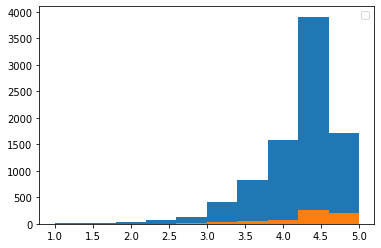

In [61]:
plt.hist(df1['Rating'].dropna())
plt.hist(df2['Rating'].dropna())
plt.legend()
plt.show()

### free app rating distribution/bar chart

In [81]:
r1=stats(df1,'Rating','ratings','count')
r1

,ratings,count
0,4.4,1031
1,4.3,1025
2,4.5,965
3,4.2,890
4,4.6,741
5,4.1,676
6,4,546
7,4.7,446
8,3.9,370
9,3.8,282


In [63]:


'''
col='Rating'
v1=df1[col].value_counts().reset_index()
v1.columns=['ratings','count']
v1

'''

"\ncol='Rating'\nv1=df1[col].value_counts().reset_index()\nv1.columns=['ratings','count']\nv1\n\n"

In [82]:
r2=stats(df2,'Rating','ratings','count')
r2

,ratings,count
0,4.6,82
1,4.4,78
2,4.5,73
3,4.2,62
4,4.7,53
5,4.3,51
6,4.8,39
7,4.1,32
8,5.0,28
9,4.0,22


In [65]:


'''
col='Rating'
v2=df2[col].value_counts().reset_index()
v2.columns=['ratings','count']
v2
'''

"\ncol='Rating'\nv2=df2[col].value_counts().reset_index()\nv2.columns=['ratings','count']\nv2\n"

In [66]:


## if u want to assign some title
''' trace1 = go.Bar(x=v1['ratings'], y=v1["count"], name="Paid",  marker=dict(color="#6ad49b"))
    layout={'title':"Paid App Rating",'xaxis':{'title':"Ratingss"}}
    fig = go.Figure(data=[trace1], layout=layout)
    iplot(fig)
'''

' trace1 = go.Bar(x=v1[\'ratings\'], y=v1["count"], name="Paid",  marker=dict(color="#6ad49b"))\n    layout={\'title\':"Paid App Rating",\'xaxis\':{\'title\':"Ratingss"}}\n    fig = go.Figure(data=[trace1], layout=layout)\n    iplot(fig)\n'

### Analysing App Category

In [93]:
free_cat=stats(df1,'Category','categories','count')
free_cat

,categories,count
0,FAMILY,1780
1,GAME,1061
2,TOOLS,765
3,BUSINESS,446
4,PRODUCTIVITY,396
5,LIFESTYLE,363
6,SPORTS,360
7,COMMUNICATION,360
8,MEDICAL,354
9,FINANCE,349


In [94]:
paid_cat=stats(df2,'Category','categories','count')
paid_cat

,categories,count
0,FAMILY,191
1,MEDICAL,109
2,GAME,83
3,PERSONALIZATION,83
4,TOOLS,78
5,BOOKS_AND_REFERENCE,28
6,PRODUCTIVITY,28
7,COMMUNICATION,27
8,SPORTS,24
9,PHOTOGRAPHY,22


In [ ]:
need_visual(free_cat,paid_cat,'categories','count')

In [69]:
'''
trace1 = go.Scatter(x=free_cat['categories'], y=free_cat["count"], name="Free")
trace2 = go.Scatter(x=paid_cat['categories'], y=paid_cat["count"], name="Paid")
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)
'''

### lets make this visualisation more attractive

In [70]:
## lets sort dataframe considering category feature
free_cat=free_cat.sort_values(by='categories')

In [71]:
paid_cat=paid_cat.sort_values(by='categories')

In [ ]:
need_visual(free_cat,paid_cat,'categories','count')

In [72]:
'''trace1 = go.Scatter(x=free_cat['categories'], y=free_cat["count"], name="Free")
trace2 = go.Scatter(x=paid_cat['categories'], y=paid_cat["count"], name="Paid")
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)'''

### Analysing Android version feature

In [73]:
data['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10840, dtype: object

In [96]:
free_android=stats(df1,'Android Ver','Android Versions','Total_applications')
paid_android=stats(df2,'Android Ver','Android Versions','Total_applications')

In [75]:
## sort your dataframe
free_android.sort_values(by='Android Versions')

,Android Versions,Total_applications
26,1.0 and up,2
19,1.5 and up,14
13,1.6 and up,77
17,2.0 and up,26
27,2.0.1 and up,2
12,2.1 and up,107
28,2.2 - 7.1.1,1
11,2.2 and up,195
5,2.3 and up,580
8,2.3.3 and up,251


In [97]:
free_android=free_android.sort_values(by='Android Versions')
paid_android=paid_android.sort_values(by='Android Versions')

In [98]:
free_android.columns

Index(['Android Versions', 'Total_applications'], dtype='object')

In [ ]:
need_visual(free_android,paid_android,'Android Versions', 'Total_applications')

In [78]:
'''
trace1 = go.Scatter(x=free_android['Android Versions'], y=free_android['Total_applications'], name="Free")
trace2 = go.Scatter(x=paid_android['Android Versions'], y=paid_android['Total_applications'], name="Paid")
y = [trace1, trace2]
layout={'title':"Android Versions"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)
'''

### Total Installs distribution

In [79]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [100]:
## to maintain hierarchy call sort_values
ins_free=stats(df1,'Installs','installs','count').sort_values(by='installs')
ins_free

,installs,count
19,0+,4
18,1+,46
4,"1,000+",759
0,"1,000,000+",1555
17,"1,000,000,000+",58
11,10+,316
3,"10,000+",925
1,"10,000,000+",1249
6,100+,623
2,"100,000+",1079


In [101]:
ins_paid=stats(df2,'Installs','installs','count').sort_values(by='installs')

In [ ]:
need_visual(ins_free,ins_paid,'installs','count')

In [82]:
'''
trace1 = go.Scatter(x=ins_free['installs'], y=ins_free["count"], name="Free")
trace2 = go.Scatter(x=ins_paid['installs'], y=ins_paid["count"], name="Paid")
y = [trace1, trace2]
layout={'title':"Installed App ",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)
'''

## Lets Perform Data Cleaning

In [103]:
data.shape

(10840, 15)

In [104]:
data.isnull().sum()

App                  0
Category             1
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
year_added           0
month_added          0
dtype: int64

#### Data Cleaning on Price feature

In [85]:
data.dtypes

App                       object
Category                  object
Rating                    object
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

In [86]:
### gives u error -->> data['Price'].astype(float)

In [87]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [88]:
## by-default value of display.max_rows is 10
pd.set_option('display.max_rows',10)
data['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$18.99        1
$3.02         1
$4.80         1
$3.08         1
$46.99        1
Name: Price, Length: 92, dtype: int64

In [89]:
## 10223-- due to count of 0,$0.99 , $9.0 ,$4.60 ---
sum(data['Price'].str.contains('0'))

10223

In [90]:
data[data['Price']=='$4.99']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
995,My Talking Pet,ENTERTAINMENT,4.6,6238,Varies with device,"100,000+",Paid,$4.99,Everyone,Entertainment,2018-06-30,Varies with device,Varies with device,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,Advanced EX for MITSUBISHI,TOOLS,2.9,33,141k,"1,000+",Paid,$4.99,Everyone,Tools,2015-08-21,1.1,1.6 and up,2015,8
10047,Advanced EX for KIA,TOOLS,3.3,257,160k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-14,1.4,1.6 and up,2015,3
10050,Advanced EX for NISSAN,TOOLS,2.9,164,144k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-14,1.3,1.6 and up,2015,3
10051,Advanced EX for FIAT,TOOLS,3.5,138,141k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-05,1.6,1.6 and up,2015,3


In [91]:
data['Price'][234]

'$4.99'

In [92]:
x='$4.99'
x[1:]

'4.99'

In [93]:
float(x[1:])

4.99

In [94]:
## with respect to zero  , this is a problem
x='0'
x[1:]

''

In [105]:
def remove_dollar(x):
    if x== '0':
        return 0
    else:
        return x[1:]

In [96]:
type(data['Price'][0])

str

In [97]:
data['Price'][0]

'0'

In [98]:
x=data['Price'][0]
remove_dollar(x)

0

In [121]:
### create a copy of your data so that wahatever manipulations I will do , just perforn it on dataframe
dataframe=data.copy()


In [122]:
dataframe['Price']=dataframe['Price'].apply(remove_dollar)

In [101]:
dataframe['Price'].unique()

array([0, '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99', '299.99',
       '379.99', '37.99', '18.99', '389.99', '19.90', '8.49', '1.75',
       '14.00', '4.85', '46.99', '109.99', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '4.29',
       '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.20', '1.04'],
      dtype=object)

In [112]:
def convert_into_float(feature,df):
    print('Before manipulation , Data type of {} was {}'.format(feature,df[feature].dtype))
    df[feature]=df[feature].astype(float)
    print('After data Cleaning  , Data type of {} is {}'.format(feature,df[feature].dtype))

In [123]:
convert_into_float('Price',dataframe)

Before manipulation , Data type of Price was object
After data Cleaning  , Data type of Price is float64


(array([1.0815e+04, 4.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.6000e+01]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.]),
 <a list of 10 Patch objects>)

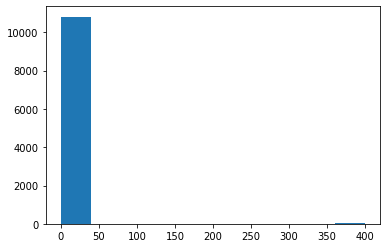

In [117]:
plt.hist(dataframe['Price'])

In [106]:
dataframe.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1


In [107]:
pd.set_option('display.max_rows',20)
dataframe.dtypes

App                       object
Category                  object
Rating                    object
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

### clean your rating feature

In [124]:
dataframe['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [125]:
dataframe['Rating'].replace('1.9',1.9,inplace=True)

In [126]:
dataframe['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [127]:
dataframe['Rating'].dtype

dtype('float64')

In [120]:
convert_into_float('Rating',dataframe)

Before manipulation , Data type of Rating was float64
After data Cleaning  , Data type of Rating is float64


In [128]:
dataframe.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

In [129]:
### lets convert data-type of Reviews from objec to float
convert_into_float('Reviews',dataframe)

Before manipulation , Data type of Reviews was object
After data Cleaning  , Data type of Reviews is float64


### Data Cleaning on Size feature

In [115]:
dataframe['Size'].value_counts().index

Index(['Varies with device', '11M', '12M', '14M', '13M', '15M', '17M', '19M',
       '16M', '26M',
       ...
       '169k', '91k', '245k', '981k', '81k', '414k', '306k', '54k', '240k',
       '20k'],
      dtype='object', length=461)

In [ ]:
pd.set_option('display.max_rows',461)
dataframe['Size'].value_counts()

In [117]:
dataframe['Size'][678]

'3.9M'

In [118]:
float(dataframe['Size'][678][0:-1])

3.9

In [119]:
x='23M'
float(x[0:-1])

23.0

In [120]:
## function to convert kb into mb
def convert_into_MB(x):
    if 'M' in x:
        return float(x[0:-1])
    else:
        mb=float(x[0:-1])/1024
        mb=np.round(mb,2)
        return mb

In [121]:
convert_into_MB('234k')

0.23

In [122]:
convert_into_MB('23M')

23.0

In [123]:
## gives error bcz we have 'Varies with devices'
## dataframe['Size'].apply(convert_into_MB)

In [124]:
dataframe.shape

(10840, 15)

In [125]:
dataframe[dataframe['Size']=='Varies with device'].shape

(1694, 15)

In [126]:
### lets replace all the rows having 'Varies with device' with median of 'Size'

In [127]:
filter=dataframe['Size']=='Varies with device'
data3=dataframe[~filter]

In [128]:
data3['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10835    9.6M
10836     53M
10837    3.6M
10838    9.5M
10840     19M
Name: Size, Length: 9146, dtype: object

In [129]:
data3['Size']=data3['Size'].apply(convert_into_MB)

C:\Users\mcr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



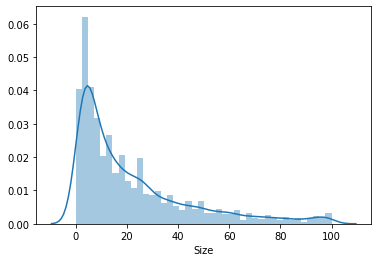

In [130]:
sns.distplot(data3['Size'])

In [131]:
data3['Size'].median()

13.0

In [132]:
data3['Size'].mean()

21.514150448283303

In [133]:
dataframe['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [134]:
dataframe['Size'].replace('Varies with device','13M',inplace=True)

In [135]:
dataframe['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '13M', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M',
       '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k',
       '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M',
     

In [136]:
dataframe['Size']=dataframe['Size'].apply(convert_into_MB)

In [137]:
dataframe['Size'].dtype

dtype('float64')

In [138]:
dataframe.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

In [139]:
dataframe.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1


In [140]:
### still Installs needs cleaning

### Data Cleaning for installs 

In [141]:
dataframe['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In [142]:
## as there is no such info to what value 10,000+ should be replaced ?
## so we will replce 10,000+ with `10000

## now to reomve +
dataframe['Installs'][0]

'10,000+'

In [143]:
x=dataframe['Installs'][0].replace(',','')
x

'10000+'

In [144]:
int(x.replace('+',''))

10000

In [145]:
def clean_installs(x):
    x=x.replace(',','')
    return int(x.replace('+',''))

In [146]:
clean_installs('10,000+')

10000

In [147]:
dataframe['Installs']=dataframe['Installs'].apply(clean_installs)

In [148]:
dataframe.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_added                 int64
month_added                int64
dtype: object

In [149]:
### Current_version & Android_version will not impact that much on to predict rating , so we can eliminate it..
### what impact most is ??        User Satisfaction

In [150]:
dataframe.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1


In [151]:
dataframe['Category'].nunique()

33

In [152]:
## removing un-neccsay features from Data

dataframe.drop(['App','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [153]:
dataframe.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,year_added,month_added
0,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,2018,1
1,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,2018,1


## Feature Selection using SelectKBest to select most significant features

In [154]:
fe=dataframe.dropna()

In [155]:
## we have to find most significant across 'Reviews','Size','Installs','Price'

ind_features=['Reviews','Size','Installs','Price']

In [156]:
X=fe[ind_features]


In [157]:

y = fe["Rating"]


In [158]:
X.shape

(9366, 4)

In [159]:
y.shape

(9366,)

In [160]:
dataframe.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,year_added,month_added
0,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,2018,1
1,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,2018,1


In [161]:
### to find releveant features for my regression model , i use SelectKBest

## SelectKBest(Score_func=f_regression , k='no_of_features i want')
from sklearn.feature_selection import SelectKBest, f_regression
X_new = SelectKBest(f_regression, k=3).fit_transform(X,y)

In [162]:
X_new[0:5]


## it will select review , size & install

array([[1.59000e+02, 1.90000e+01, 1.00000e+04],
       [9.67000e+02, 1.40000e+01, 5.00000e+05],
       [8.75100e+04, 8.70000e+00, 5.00000e+06],
       [2.15644e+05, 2.50000e+01, 5.00000e+07],
       [9.67000e+02, 2.80000e+00, 1.00000e+05]])

In [163]:
### but how selectkbest selects Reviews & Size & install as my relevant features??
## lets understand how selectkbest works , if i use score=f_regression

In [164]:
### we use regression plot to understand relation 

In [165]:
from scipy import stats
from scipy.stats.stats import pearsonr

C:\Users\mcr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



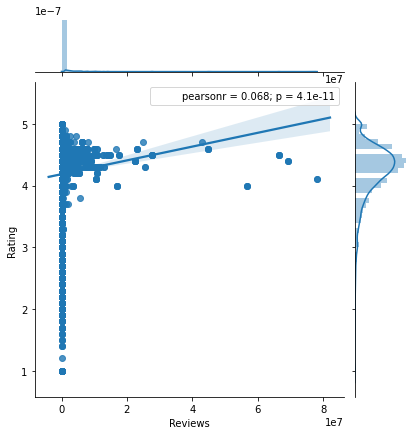

In [166]:
## there is a linear relationship between Ratings & target("Rating") &   p-value is also very less ie less than 0.05 ie
## we have to accept alternate hypo..


## pearsonr( ) from scipy module-- accepts 2 arrays & returns correlation coefficient along with significance value(p-value)
j = sns.jointplot('Reviews', "Rating", data = fe, kind = 'reg')
j.annotate(stats.pearsonr)

In [167]:
### Key-insights-- Reviews is a relevant feature

In [168]:
from scipy.stats.stats import pearsonr
pearsonr(fe['Reviews'],fe["Rating"])

## -0.0681414670009895--corelation coeff.
## 4.073073265516564e-11-- p-value

(0.0681414670009895, 4.073073265516564e-11)

In [169]:
## lets store stats (corelation coeff. ,p-value) with respect to each feature in a list
out_list = []
for column in ind_features:
    corr_tuple = pearsonr(fe[column], fe["Rating"])
    out_list.append([column, corr_tuple[0], corr_tuple[1]])

In [170]:
out_list

[['Reviews', 0.0681414670009895, 4.073073265516564e-11],
 ['Size', 0.06595823670809853, 1.6651742451097327e-10],
 ['Installs', 0.05135456605599874, 6.605578654024468e-07],
 ['Price', -0.021903300801355982, 0.0340287274398926]]

In [171]:
corr_df = pd.DataFrame(out_list, columns=["Features", "Correlation", "P-Value"])
corr_df

,Features,Correlation,P-Value
0,Reviews,0.068141,4.073073e-11
1,Size,0.065958,1.665174e-10
2,Installs,0.051355,6.605579e-07
3,Price,-0.021903,3.402873e-02


In [172]:
## lets sort it in the ascending order
corr_df.sort_values(by=['P-Value'], inplace=True)

In [173]:
## smaller the p-value , more important feature or more significant feature is !

corr_df.head()

,Features,Correlation,P-Value
0,Reviews,0.068141,4.073073e-11
1,Size,0.065958,1.665174e-10
2,Installs,0.051355,6.605579e-07
3,Price,-0.021903,3.402873e-02


In [174]:
dataframe.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'year_added', 'month_added'],
      dtype='object')

In [175]:
### we will eliminate Price as due to less relationship between Price & Rating & ofcourse p-value is also not very less
### in comparison to other features

In [176]:
dataframe.drop('Price',axis=1,inplace=True)

In [177]:
dataframe.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,Everyone,2018,1
1,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,Everyone,2018,1


In [178]:
dataframe.corr()

,Rating,Reviews,Size,Installs,year_added,month_added
Rating,1.000000,0.068147,0.066286,0.051393,0.137317,0.018075
Reviews,0.068147,1.000000,0.104032,0.643122,0.075537,0.045946
Size,0.066286,0.104032,1.000000,0.047699,0.181947,0.028715
Installs,0.051393,0.643122,0.047699,1.000000,0.089368,0.056466
year_added,0.137317,0.075537,0.181947,0.089368,1.000000,-0.187359
month_added,0.018075,0.045946,0.028715,0.056466,-0.187359,1.000000


## Outliers Detection & Dealing with it..

In [179]:
### Outliers Detection in size,reviews,ratings & Installs

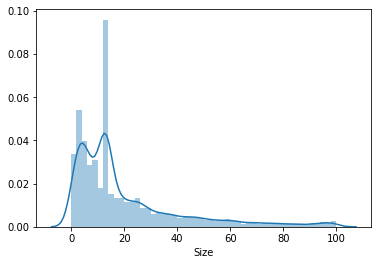

In [180]:
sns.distplot(dataframe['Size'])

In [181]:
dataframe.shape

(10840, 9)

### Outliers removal in Size using 1 std dev
####  ie whatever data is outside of 1std dev , just remove it..

In [182]:
## finding outliers in Size when apps are Free & Paid as well , so for this we have to use groupby


def remove_pps_outliers(df,feature):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Type'):
        m = np.mean(subdf[feature])
        st = np.std(subdf[feature])
        reduced_df = subdf[(subdf[feature]>(m-st)) & (subdf[feature]<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [183]:

op=remove_pps_outliers(dataframe,'Size')

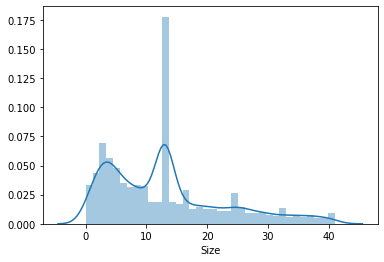

In [184]:
sns.distplot(op['Size'])

In [185]:
op.shape

(9320, 9)

### Outliers in Installs using IQR(Interquantile Range)

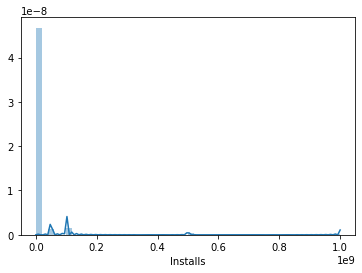

In [186]:
sns.distplot(op['Installs'])

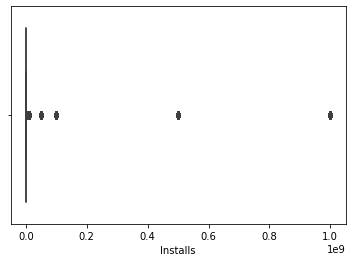

In [187]:
sns.boxplot(op['Installs'])

* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represnt the largest value in the data set.

In [188]:
q1 = op['Installs'].quantile(0.25)
q3 = op['Installs'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
print(Lower_tail)
Upper_tail = q3 + 1.5 * iqr
print(Upper_tail)

-1497500.0
2498500.0


In [189]:
outliers=[]
for install in op['Installs']:
    if install > Upper_tail or install < Lower_tail:
            outliers.append(install)
    else:
        continue

In [ ]:
print(outliers)

In [191]:
len(outliers)

2207

#### Replace Outliers with the median value

In [192]:
for install in op['Installs']:
    if install > Upper_tail or install < Lower_tail:
        op['Installs'] = op['Installs'].replace(install, np.median(op['Installs']))
    else:
        continue

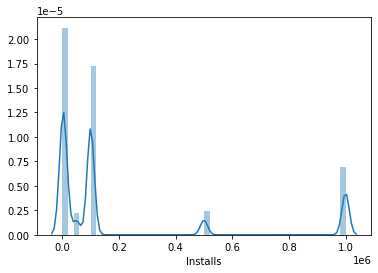

In [193]:
sns.distplot(op['Installs'])

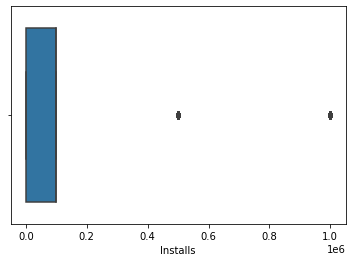

In [194]:
sns.boxplot(op['Installs'])

In [195]:
op2=op.copy()

In [196]:
op2.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,Everyone,2018,1
1,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,Everyone,2018,1


In [197]:
op2.shape

(9320, 9)

#### Outliers in Reviews

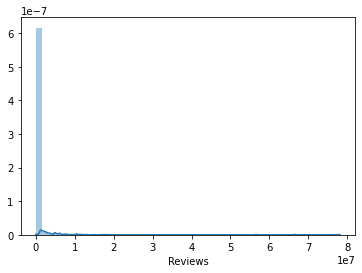

In [198]:
sns.distplot(op2['Reviews'])

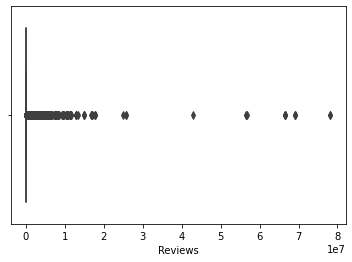

In [199]:
sns.boxplot(op2['Reviews'])

In [200]:
### After having Conversation with my Business Team ,Domain expertise will suggest us the value of 1e7(10^6) as Threshold value.

## data points that are > than 1e7 are outliers
op2[op2['Reviews']>1e7].shape

(58, 9)

In [201]:
op2.shape

(9320, 9)

In [202]:
op2['Reviews'].max()

78158306.0

In [203]:
op2['Reviews'].median()

1192.0

In [204]:
op2['Reviews'].quantile(0.75)

38958.0

In [205]:
op2['Reviews'].mean()

349258.57628755365

In [206]:
threshold=1e7
op2[op2['Reviews']>threshold].shape

(58, 9)

#### Replacing Outliers with the Median..

In [207]:
op2['Reviews']=np.where(op2['Reviews']>threshold,op2['Reviews'].median(),op2['Reviews'])

In [208]:
op2['Reviews'].mean()

193907.85922746782

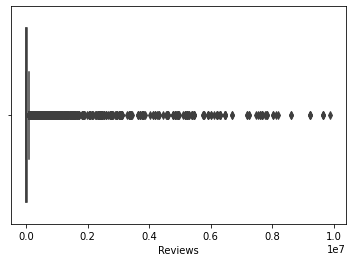

In [209]:
sns.boxplot(op2['Reviews'])

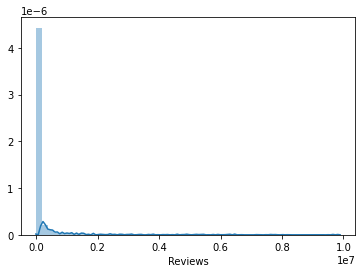

In [210]:
sns.distplot(op2['Reviews'])

In [211]:
### Still lots of right skewness
### we can Log transformation to remove this positive skewness(high outliers)


#### Apllying Log Transformation

In [212]:
op2['Reviews']=np.log1p(op2['Reviews'])

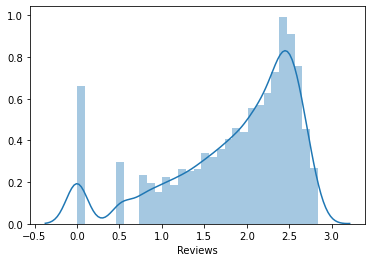

In [213]:
sns.distplot(np.log1p(op2['Reviews']))

## now it is approximately close to Normal Distribution..

### Data Cleaning on Rating feature

In [214]:
op2['Rating'].isna().sum()

1396

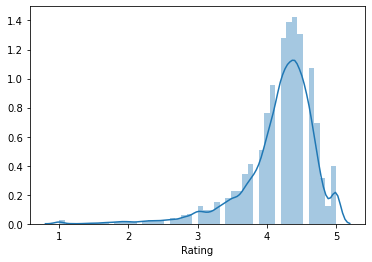

In [215]:
sns.distplot(op2['Rating'].dropna())

### lets fill out missing values first in Rating

In [216]:
op2.shape

(9320, 9)

In [217]:
op2.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,ART_AND_DESIGN,4.1,5.075174,19.0,10000,Free,Everyone,2018,1
1,ART_AND_DESIGN,3.9,6.875232,14.0,500000,Free,Everyone,2018,1
2,ART_AND_DESIGN,4.7,11.379520,8.7,100000,Free,Everyone,2018,8
3,ART_AND_DESIGN,4.5,12.281389,25.0,100000,Free,Teen,2018,6
4,ART_AND_DESIGN,4.3,6.875232,2.8,100000,Free,Everyone,2018,6


In [218]:
op2['Rating'].dtype

dtype('float64')

In [219]:
op2['Rating'].isnull().sum()

1396

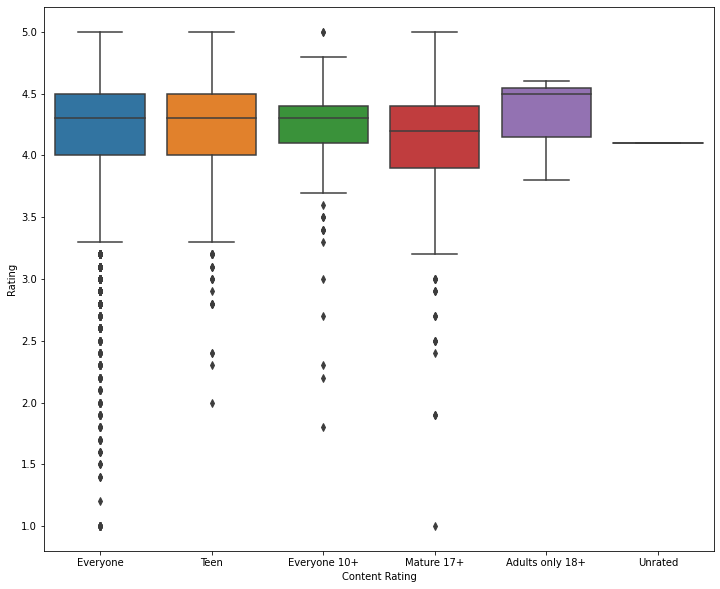

In [220]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Content Rating',y='Rating',data=op2)

#we can visualise in box plot that,for class Everyone,avg rating is somewhere around 4.3,
## for Teen,it is around approx 4.3, 


## but we will not that much accurate results , to get accurate we will use groupby on Content Rating..


In [221]:
op2.groupby('Content Rating')['Rating'].mean()

Content Rating
Adults only 18+    4.300000
Everyone           4.178822
Everyone 10+       4.213910
Mature 17+         4.103448
Teen               4.212376
Unrated            4.100000
Name: Rating, dtype: float64

In [222]:
#create a func where we r giving rating & content rating col in a list(cols)
def impute_Rating(cols):
    
    #first col is age,2nd col is basicallly pclass
    Rating = cols[0]
    Content_Rating = cols[1]
    
    
    #ie if there is a null value in a col
    if pd.isnull(Rating):

        if Content_Rating == 'Adults only 18+':
            return 4.3

        elif Content_Rating == 'Everyone':
            return 4.17
        
        elif Content_Rating == 'Everyone 10+':
            return 4.21
        
        elif Content_Rating == 'Mature 17+':
            return 4.21
        
        elif Content_Rating == 'Teen':
            return 4.17

        else:
            return 4.1
        
#when not null we basically return rating value 
    else:
        return Rating

In [223]:
#apply func
op2['Rating']=op2[['Rating','Content Rating']].apply(impute_Rating,axis=1)

In [224]:
### or we can use Random value Imputation , but at that time we will get accuracy in logistic is 68  , in rf we get 70

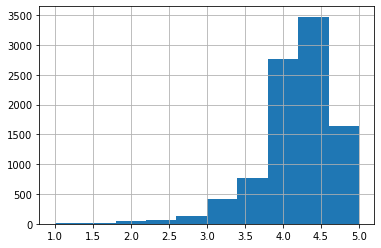

In [225]:
op2['Rating'].hist()

In [226]:
### as our Dependent feature count is varying alot  , as it is not a Normally distributed data  , as count of 4.1 is too high
### so if we will build a model considering this Rating feature ,our model accuracy gets fluctauted alot

## so we will do some manipulations on Rating & convert it into Discrete nature..


In [227]:
def convert(x):
    if x> 0.0 and x<= 1.5:
        return 1
    elif x> 1.5 and x<= 2.5:
        return 2
    elif x> 2.3 and x<= 3.5:
        return 3
    elif x> 3.5 and x<= 4.5:
        return 4
    else:
        return 5

In [228]:
op2['Rating'].apply(convert)

0       4
1       4
2       5
3       4
4       4
       ..
9315    4
9316    4
9317    4
9318    4
9319    4
Name: Rating, Length: 9320, dtype: int64

In [229]:
op2['Rating']=op2['Rating'].apply(convert)

In [230]:
op2.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,ART_AND_DESIGN,4,5.075174,19.0,10000,Free,Everyone,2018,1
1,ART_AND_DESIGN,4,6.875232,14.0,500000,Free,Everyone,2018,1


In [231]:
final=op2.copy()

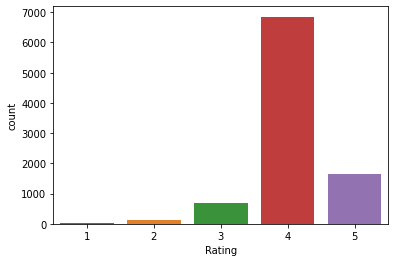

In [232]:
sns.countplot(final['Rating'])

## Feature Encoding

#### Perform Mean Encoding on Cateogry 

In [233]:
final.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,ART_AND_DESIGN,4,5.075174,19.0,10000,Free,Everyone,2018,1
1,ART_AND_DESIGN,4,6.875232,14.0,500000,Free,Everyone,2018,1
2,ART_AND_DESIGN,5,11.379520,8.7,100000,Free,Everyone,2018,8
3,ART_AND_DESIGN,4,12.281389,25.0,100000,Free,Teen,2018,6
4,ART_AND_DESIGN,4,6.875232,2.8,100000,Free,Everyone,2018,6


In [234]:
final.groupby(['Category'])['Rating'].mean()

Category
ART_AND_DESIGN         4.307692
AUTO_AND_VEHICLES      4.157895
BEAUTY                 4.200000
BOOKS_AND_REFERENCE    4.223744
BUSINESS               4.020642
COMICS                 4.033333
COMMUNICATION          3.989446
DATING                 3.891892
EDUCATION              4.309859
ENTERTAINMENT          4.022059
EVENTS                 4.258065
FAMILY                 4.076294
FINANCE                4.041791
FOOD_AND_DRINK         4.112069
GAME                   4.139752
HEALTH_AND_FITNESS     4.176471
HOUSE_AND_HOME         4.095238
LIBRARIES_AND_DEMO     4.075000
LIFESTYLE              4.063712
MAPS_AND_NAVIGATION    3.928000
MEDICAL                4.093525
NEWS_AND_MAGAZINES     4.032143
PARENTING              4.260000
PERSONALIZATION        4.164021
PHOTOGRAPHY            4.030000
PRODUCTIVITY           4.094293
SHOPPING               4.128514
SOCIAL                 4.100372
SPORTS                 4.080597
TOOLS                  3.961306
TRAVEL_AND_LOCAL       3.995475

In [235]:
mean_ordinal=final.groupby(['Category'])['Rating'].mean().to_dict()

In [236]:
final['Category']=final['Category'].map(mean_ordinal)

### applying Target Guided Mean encoding On Content_Rating

In [237]:
final['Content Rating'].value_counts()

Everyone           7693
Teen                929
Mature 17+          412
Everyone 10+        281
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [238]:
final.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Adults only 18+    4.333333
Everyone           4.071624
Everyone 10+       4.074733
Mature 17+         4.002427
Teen               4.095802
Unrated            4.000000
Name: Rating, dtype: float64

In [239]:
final.groupby(['Content Rating'])['Rating'].mean().sort_values().index

Index(['Unrated', 'Mature 17+', 'Everyone', 'Everyone 10+', 'Teen',
       'Adults only 18+'],
      dtype='object', name='Content Rating')

In [240]:
ordinal_labels=final.groupby(['Content Rating'])['Rating'].mean().sort_values().index
ordinal_labels

Index(['Unrated', 'Mature 17+', 'Everyone', 'Everyone 10+', 'Teen',
       'Adults only 18+'],
      dtype='object', name='Content Rating')

#### now we have to convert this List/array into dictionary so that we can directly map it

    1.Either U can convert it into dictionary using Enumerate
    2.or using Update
    3.Or manually create dictionary

In [241]:
enumerate(ordinal_labels,0)

In [242]:
dict_store={k:i for i,k in enumerate(ordinal_labels,0)}
dict_store

{'Unrated': 0,
 'Mature 17+': 1,
 'Everyone': 2,
 'Everyone 10+': 3,
 'Teen': 4,
 'Adults only 18+': 5}

#### Alternative

In [243]:
dict_store={}
for i in range(len(ordinal_labels)):
    dict_store[ordinal_labels[i]]=i

In [244]:
dict_store

{'Unrated': 0,
 'Mature 17+': 1,
 'Everyone': 2,
 'Everyone 10+': 3,
 'Teen': 4,
 'Adults only 18+': 5}

In [245]:
final['Content Rating']=final['Content Rating'].map(dict_store)
final.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,4.307692,4,5.075174,19.0,10000,Free,2,2018,1
1,4.307692,4,6.875232,14.0,500000,Free,2,2018,1
2,4.307692,5,11.379520,8.7,100000,Free,2,2018,8
3,4.307692,4,12.281389,25.0,100000,Free,4,2018,6
4,4.307692,4,6.875232,2.8,100000,Free,2,2018,6


### applying Label Encoding on Type column

In [246]:
from sklearn.preprocessing import LabelEncoder

In [247]:
le=LabelEncoder()


In [248]:
final['Type']=le.fit_transform(final['Type'])

In [249]:
final.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,4.307692,4,5.075174,19.0,10000,0,2,2018,1
1,4.307692,4,6.875232,14.0,500000,0,2,2018,1


In [250]:
final.shape

(9320, 9)

In [251]:
final.isnull().sum()

Category          1
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
year_added        0
month_added       0
dtype: int64

In [252]:
final.dropna(inplace=True)

In [253]:
dataframe2=final.copy()

In [254]:
dataframe2.dtypes

Category          float64
Rating              int64
Reviews           float64
Size              float64
Installs            int64
Type                int32
Content Rating      int64
year_added          int64
month_added         int64
dtype: object

In [255]:
X=dataframe2.drop('Rating',axis=1)
y=dataframe2['Rating']
##y=y.astype('int')

In [256]:
y.astype('int')

0       4
1       4
2       5
3       4
4       4
       ..
9315    4
9316    4
9317    4
9318    4
9319    4
Name: Rating, Length: 9319, dtype: int32

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=True)

In [258]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_c=LogisticRegression(random_state=0)


In [259]:
lr_c.fit(X_train,y_train)


C:\Users\mcr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [260]:
lr_pred=lr_c.predict(X_test)


In [261]:
from sklearn.metrics import confusion_matrix ,accuracy_score,r2_score
lr_cm=confusion_matrix(y_test,lr_pred)
lr_cm

array([[   0,    0,    0,    2,    0],
       [   0,    0,    0,   27,    0],
       [   0,    0,    0,  131,    0],
       [   0,    0,    0, 1366,    0],
       [   0,    0,    0,  338,    0]], dtype=int64)

In [262]:
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 0.7328326180257511


### Applying Random Forest on Data

In [263]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
# Random Forest Classifier
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [265]:
rf_pred=rf.predict(X_test)


In [266]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
rf_cm=confusion_matrix(y_test,rf_pred)
rf_cm

array([[   0,    0,    0,    2,    0],
       [   0,    0,    0,   27,    0],
       [   0,    0,   13,  115,    3],
       [   0,    0,   11, 1314,   41],
       [   0,    0,    1,  248,   89]], dtype=int64)

In [267]:
rf_ac=accuracy_score(rf_pred,y_test)
rf_ac

0.759656652360515

### Automate your Predictions

In [268]:
### or by-default set dump as None
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump=None):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    cm=confusion_matrix(y_test,y_prediction)
    print('Confusion Matrix : \n {}'.format(cm))
    print('Accuracy Score:',accuracy_score(y_prediction,y_test))

    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('E:\End-2-end Projects\Flight_Price/model.pkl','wb')
        pickle.dump(model,file)

In [269]:
predict(RandomForestClassifier())

Training score : 0.9998658618376928
predictions are: 
 [4 4 4 ... 4 4 4]


Confusion Matrix : 
 [[   0    0    0    2    0]
 [   0    0    1   25    1]
 [   0    0   14  114    3]
 [   0    0    8 1316   42]
 [   0    0    0  252   86]]
Accuracy Score: 0.759656652360515


In [270]:

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [271]:
predict(SVC())

Training score : 0.7360160965794769
predictions are: 
 [4 4 4 ... 4 4 4]


Confusion Matrix : 
 [[   0    0    0    2    0]
 [   0    0    0   27    0]
 [   0    0    0  131    0]
 [   0    0    0 1366    0]
 [   0    0    0  338    0]]
Accuracy Score: 0.7328326180257511


### Hyperparameter Optimization on Logistic Regression

In [272]:
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()

In [273]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [274]:
grid

{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'penalty': ['l1', 'l2']}

In [275]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [276]:
## 
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\mcr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [277]:
clf.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [278]:
clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [279]:
log=LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [280]:

log.fit(X_train,y_train)
y_pred2=log.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[   0    0    0    2    0]
 [   0    0    0   27    0]
 [   0    0    0  131    0]
 [   0    0    0 1366    0]
 [   0    0    0  338    0]]
0.7328326180257511


C:\Users\mcr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Hyper-parameter optimization of Random forest

In [281]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 257, 505, 752, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6], 'criterion': ['entropy', 'gini']}


In [ ]:
## takes 14 mins if entire data
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

In [ ]:
rf_randomcv.best_estimator_

In [ ]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=257, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=650,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
pred3=rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred3))
print("Accuracy Score {}".format(accuracy_score(y_test,pred3)))


## Automate your HyperTuning

In [ ]:
from sklearn.model_selection import ShuffleSplit ,GridSearchCV
#grid search cv not only tell best algo but also tell best parameter for algo


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'C':10.0 **np.arange(-2,3),
                'penalty':['l1','l2']
                
            }
        },
        

        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini','entropy'],
                
            }
        },
        
        
        
        'random_forest':{
            
            'model':RandomForestClassifier(),
            'params':{
                'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)],
                'max_features' :['auto', 'sqrt','log2'],
                'max_depth':[int(x) for x in np.linspace(10, 1000,5)],
                'min_samples_split':[2, 5, 10, 14],
                'min_samples_leaf':[1, 2, 4, 6],
                'criterion':['entropy','gini']
                
                
                
            }
        }
    }
    
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
find_best_model_using_gridsearchcv(X,y)